In [321]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr

In [322]:
os.getcwd()
sys.path.append('/home/sean/Documentos/the_bridge_bootcamp/My_Workspaces/Fish_EDA/src')

In [323]:
import utils.variables as variables

In [324]:
aquaculture_quantity_value = pd.read_csv("../data/Aquaculture_Quantity_Code_Merged.csv", 
                                         usecols = ['PERIOD', 'Quantity', 'Country', 'WaterArea', 
                                                    'Species', 'Scientific_Name', 'Environment'])
print(aquaculture_quantity_value.shape)

(96571, 7)


In [325]:
population_by_country = pd.read_csv("../data/Population_by_Country.csv")
print(population_by_country.shape)

(235, 2)


In [326]:
gpd_per_capita = pd.read_csv("../data/Country_GDP_per_Capita.csv")
gpd_per_capita.shape

(190, 2)

In [327]:
freshwater_country = pd.read_csv("../data/Freshwater_per_Country.csv")
freshwater_country.rename(columns = {'Total renewable water resources (km³)': 'Total Renewable Water'}, inplace = True)
freshwater_country.shape

(170, 2)

In [328]:
lpi_global_ranks = pd.read_csv("../data/lpi_global_ranks_2018.csv",
                               usecols=['Country', 'LPI Score'])
print(lpi_global_ranks.shape)
lpi_global_ranks.head()


(160, 2)


,Country,LPI Score
0,Germany,4.20
1,Sweden,4.05
2,Belgium,4.04
3,Austria,4.03
4,Japan,4.03


Add populations and convert to millions

In [329]:
aquaculture_quantity_value = pd.merge(aquaculture_quantity_value, population_by_country)
aquaculture_quantity_value.shape

(82586, 8)

Add GDP per capita

In [330]:
aquaculture_quantity_value = pd.merge(aquaculture_quantity_value, gpd_per_capita)
aquaculture_quantity_value.shape

(79717, 9)

Add km3 of total renewable freshwater per country

In [331]:
aquaculture_quantity_value = pd.merge(aquaculture_quantity_value, freshwater_country)
aquaculture_quantity_value.shape

(75299, 10)

Add the LPI (Logistic Performence Index) score (an of the total logistics/transport system of a country)

In [332]:
aquaculture_quantity_value = pd.merge(aquaculture_quantity_value, lpi_global_ranks)
aquaculture_quantity_value.shape

(72662, 11)

In [333]:
aquaculture_quantity_value.rename(columns = {'GDP_per_capita': 'GDP per capita',
                                             'LPI Score': 'Logistic Index'}, inplace = True)

In [338]:
salty_aquaculture_quantity_value = aquaculture_quantity_value[aquaculture_quantity_value['Environment'].isin(['Marine', 'Brackishwater'])]

In [292]:
aquaculture_quantity_value = aquaculture_quantity_value[aquaculture_quantity_value['Environment'] == 'Freshwater']

In [293]:
aquaculture_quantity_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39273 entries, 0 to 72572
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PERIOD                 39273 non-null  int64  
 1   Quantity               39273 non-null  float64
 2   Country                39273 non-null  object 
 3   WaterArea              39273 non-null  object 
 4   Environment            39273 non-null  object 
 5   Species                38769 non-null  object 
 6   Scientific_Name        39273 non-null  object 
 7   Population             39273 non-null  int64  
 8   GDP per capita         39273 non-null  int64  
 9   Total Renewable Water  39273 non-null  float64
 10  Logistic Index         39273 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


Convert tonnes to tonnes per million people. This allows a better measure of available fish for domestic consumption as well as export.

In [294]:
aquaculture_quantity_value['Kg per capita'] = ((aquaculture_quantity_value['Quantity'] * 1000) / 
                                                   aquaculture_quantity_value['Population'])

Do normalise GDP per capita, TRWR and LPI score for equal weighting (0-1). First log transform the TRWR before 0-1 scaling

In [295]:
aquaculture_quantity_value['log(Total Renewable Water)'] = np.log(aquaculture_quantity_value['Total Renewable Water'])
#aquaculture_quantity_value['log(GDP per capita)'] = np.log(aquaculture_quantity_value['GDP per capita'])

In [296]:
data = np.log(aquaculture_quantity_value['GDP per capita'] + 1)
aquaculture_quantity_value['GDP per capita'] = (data - np.min(data)) / (np.max(data) - np.min(data))

data = aquaculture_quantity_value['Logistic Index'] 
aquaculture_quantity_value['Logistic Index'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

data = aquaculture_quantity_value['log(Total Renewable Water)'] 
aquaculture_quantity_value['log(Total Renewable Water)'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

In [297]:
aquaculture_quantity_value.describe()

,PERIOD,Quantity,Population,GDP per capita,Total Renewable Water,Logistic Index,Kg per capita,log(Total Renewable Water)
count,39273.000000,3.927300e+04,3.927300e+04,39273.000000,39273.000000,39273.000000,39273.000000,39273.000000
mean,1996.968884,2.205934e+04,1.181543e+08,0.592453,582.964736,0.516637,0.094496,0.676354
std,17.399082,1.862213e+05,3.068519e+08,0.232182,1276.668570,0.250991,0.395740,0.153399
min,1950.000000,0.000000e+00,3.412430e+05,0.000000,0.020000,0.000000,0.000000,0.000000
25%,1987.000000,0.000000e+00,8.654622e+06,0.435942,43.000000,0.288889,0.000000,0.593538
50%,2001.000000,4.400000e+01,2.549988e+07,0.602051,139.600000,0.488889,0.002334,0.684627
75%,2011.000000,1.019000e+03,6.788601e+07,0.813319,457.200000,0.737778,0.030822,0.776392
max,2020.000000,5.571083e+06,1.439324e+09,1.000000,8233.000000,1.000000,13.562183,1.000000


In [298]:
aquaculture_quantity_value.describe(include = 'object')

,Country,WaterArea,Environment,Species,Scientific_Name
count,39273,39273,39273,38769,39273
unique,128,6,1,251,274
top,China,Asia - Inland waters,Freshwater,Common carp,Cyprinus carpio
freq,1324,13437,39273,3018,3018


In [299]:
aquaculture_quantity_value.head()

,PERIOD,Quantity,Country,WaterArea,Environment,Species,Scientific_Name,Population,GDP per capita,Total Renewable Water,Logistic Index,Kg per capita,log(Total Renewable Water)
0,2020,8000.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.205506,0.550874
1,2019,7950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.204221,0.550874
2,2018,7900.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.202937,0.550874
3,2017,6950.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.178533,0.550874
4,2016,6100.0,Afghanistan,Asia - Inland waters,Freshwater,Cyprinids nei,Cyprinidae,38928346,0.108047,24.77,0.0,0.156698,0.550874


Now we want to plot the relationships between fish production, fish production per million and the GPD, TRWR and LPI

In [300]:
pairplot_data = (
    aquaculture_quantity_value[aquaculture_quantity_value['PERIOD'] > 2018]
    .groupby('Country', as_index = False)
    .agg({'Kg per capita': 'sum', 
          'GDP per capita': 'mean',
          'log(Total Renewable Water)': 'mean',
          'Logistic Index': 'mean'})
)
pairplot_data['log(Kg per capita)'] = np.log(pairplot_data['Kg per capita'])
pairplot_data = pairplot_data.drop(columns = ['Kg per capita'])
pairplot_data = pairplot_data[['log(Kg per capita)', 'GDP per capita', 'Logistic Index', 'log(Total Renewable Water)']]
pairplot_data.head()

,log(Kg per capita),GDP per capita,Logistic Index,log(Total Renewable Water)
0,-0.886014,0.108047,0.000000,0.550874
1,0.270315,0.487197,0.315556,0.593538
2,-2.842135,0.467502,0.222222,0.492658
3,-2.107153,0.469603,0.044444,0.689146
4,-2.277348,0.695010,0.417778,0.821012


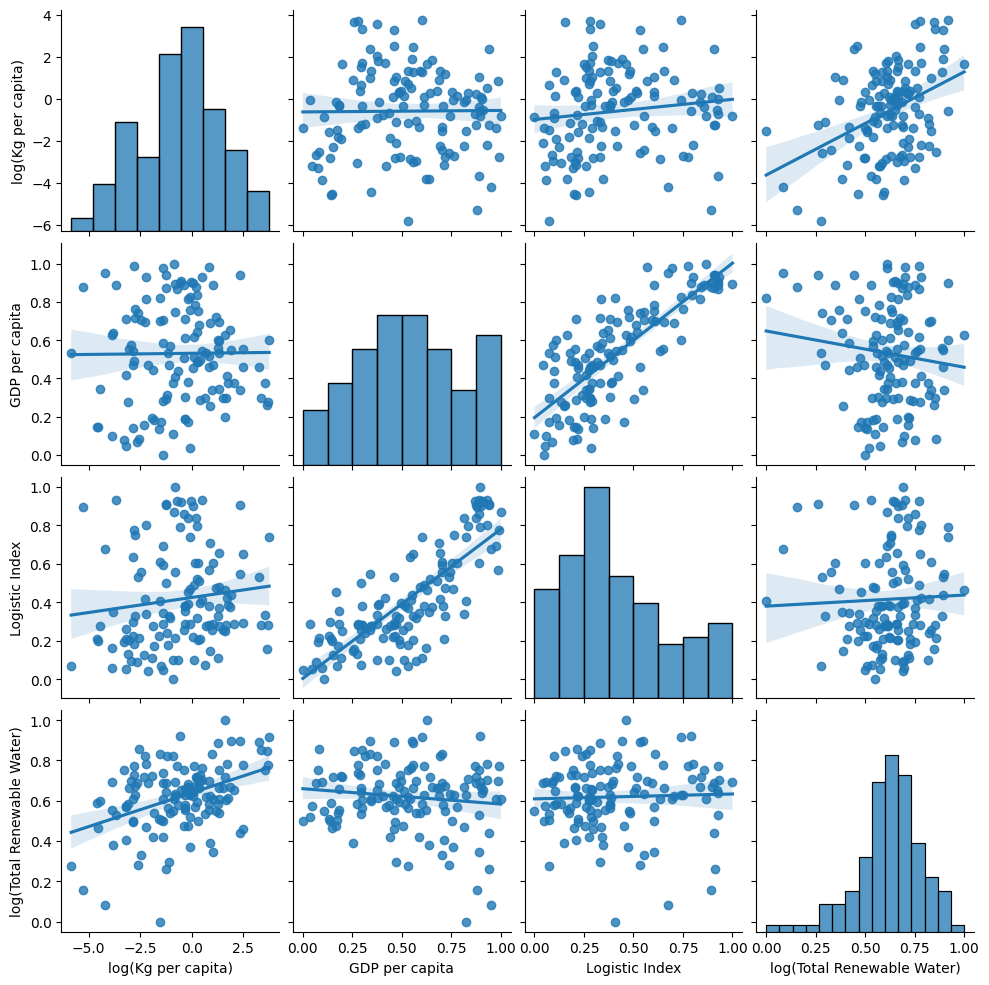

In [301]:
sns.pairplot(pairplot_data, kind = 'reg');

So to create the first part of the metric I will multiply the scaled GDP and LPI values. Then scale this again between 0-1. Then multiply this with the scaled TRWR value. The higher the value, the higher the oppotunity for fish farming

In [302]:
aquaculture_quantity_value['Infrastructure Index'] = (aquaculture_quantity_value['GDP per capita'] + 
                                                  aquaculture_quantity_value['Logistic Index'])
data = aquaculture_quantity_value['Infrastructure Index']
aquaculture_quantity_value['Infrastructure Index'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

After merging the GDP and LPI scores into one, we then add to the logged water values

In [303]:
aquaculture_quantity_value['Opportunity Index'] = (aquaculture_quantity_value['Infrastructure Index'] + 
                                                  aquaculture_quantity_value['log(Total Renewable Water)'])
data = aquaculture_quantity_value['Opportunity Index']
aquaculture_quantity_value['Opportunity Index'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

In [304]:
opportunity_index_by_country = (aquaculture_quantity_value[aquaculture_quantity_value['PERIOD'] > 2018]
                               .groupby('Country', as_index = False)
                               .agg({'Opportunity Index': 'mean', 
                                     'Infrastructure Index': 'mean',
                                     'log(Total Renewable Water)': 'mean',
                                     'Kg per capita': 'sum'})
                               .sort_values(by = 'Opportunity Index', ascending = False))
opportunity_index_by_country['log(Kg per capita)'] = np.log(opportunity_index_by_country['Kg per capita'])
#oppotunity_index_by_country = oppotunity_index_by_country.drop(columns = 'Kg per capita')

In [305]:
round(opportunity_index_by_country.head(10)[['Country', 'Opportunity Index']], 2)

,Country,Opportunity Index
21,Canada,1.00
64,Japan,0.93
89,Norway,0.92
47,Germany,0.91
6,Australia,0.91
113,Sweden,0.91
86,New Zealand,0.90
123,United Kingdom,0.86
43,France,0.86
25,China,0.85


In [306]:
round(opportunity_index_by_country.tail(10)[['Country', 'Opportunity Index']], 2)

,Country,Opportunity Index
117,Togo,0.14
78,Malawi,0.13
69,Kuwait,0.11
45,Gambia,0.10
53,Haiti,0.09
87,Niger,0.08
0,Afghanistan,0.06
73,Lesotho,0.06
75,Libya,0.06
18,Burundi,0.00


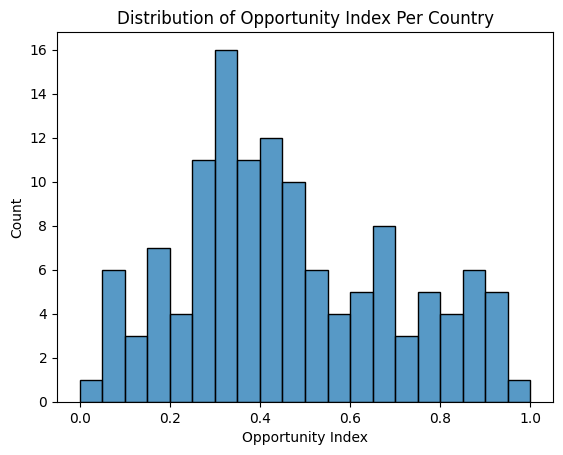

In [307]:
g = sns.histplot(data = opportunity_index_by_country, x = 'Opportunity Index', bins = 20)
g.set(title = 'Distribution of Opportunity Index Per Country');

We need to now correlate this with the variables used

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'Opportunity Index'),
  Text(1.5, 0, 'Infrastructure Index'),
  Text(2.5, 0, 'log(Total Renewable Water)'),
  Text(3.5, 0, 'log(Kg per capita)')])

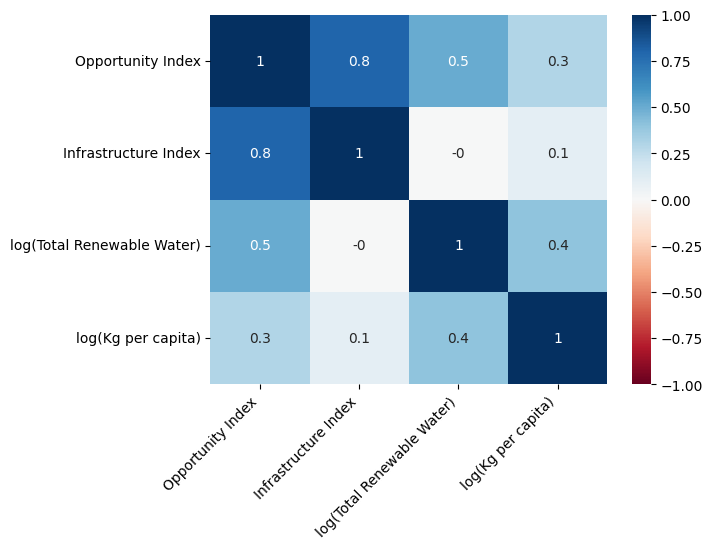

In [308]:
sns.heatmap(round(opportunity_index_by_country.drop(columns='Kg per capita').corr(), 1),
            vmin=-1, vmax=1, cmap='RdBu', annot=True)
plt.xticks(rotation = 45, ha="right")

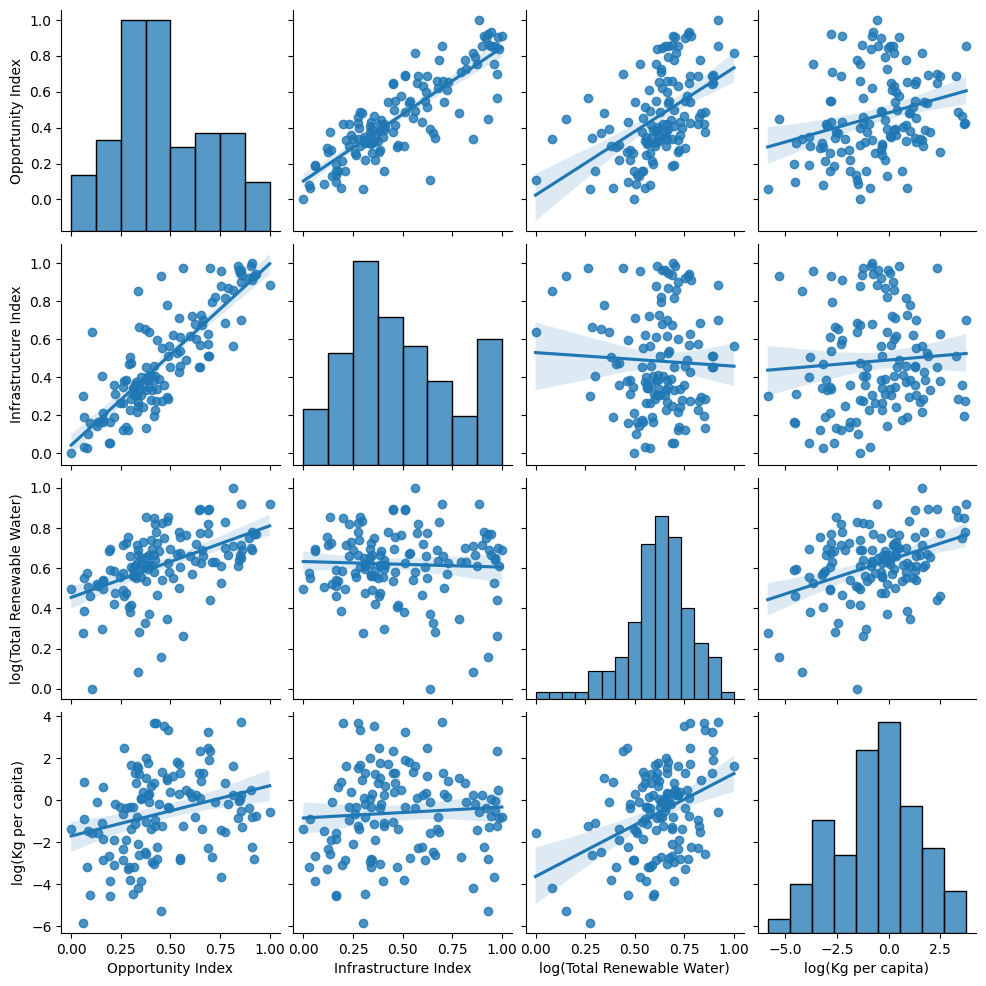

In [309]:
sns.pairplot(opportunity_index_by_country.drop(columns='Kg per capita'), kind = 'reg');

To compare the current production level with the oppotunity. First substract all tonnes per million by the max(tonnes per million). Then multiply by the index. This means countries with relatively low production but high oppotunity will get high values. Countries with already high levels and high oppotunity are already realising the potential so will score lower. 

First I will select the data from 2018 to 2020 and then sum up total production per country and carry over the Oppotunity Index

In [310]:
opportunity_index_by_country['Opportunity Gap Index'] = ((opportunity_index_by_country['log(Kg per capita)'].max() -
                                         opportunity_index_by_country['log(Kg per capita)']) *
                                        opportunity_index_by_country['Opportunity Index'])

In [311]:
data = opportunity_index_by_country['Opportunity Gap Index']                       
opportunity_index_by_country['Opportunity Gap Index'] = ((data - np.min(data)) / (np.max(data) - np.min(data)))

In [312]:
opportunity_index_by_country.sort_values(by = 'Opportunity Gap Index', ascending=False).head()

,Country,Opportunity Index,Infrastructure Index,log(Total Renewable Water),Kg per capita,log(Kg per capita),Opportunity Gap Index
89,Norway,0.919190,0.930208,0.770634,0.060987,-2.797095,1.000000
10,Belgium,0.754963,0.958518,0.527457,0.025454,-3.670890,0.931004
6,Australia,0.912239,0.909680,0.782067,0.107718,-2.228235,0.906166
98,Portugal,0.708115,0.793782,0.630899,0.065186,-2.730515,0.762530
123,United Kingdom,0.862188,0.937641,0.688622,0.280723,-1.270386,0.719156


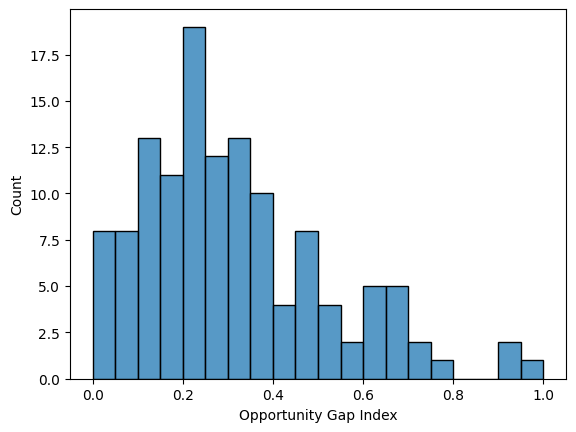

In [313]:
sns.histplot(data = opportunity_index_by_country, x = 'Opportunity Gap Index', bins = 20);

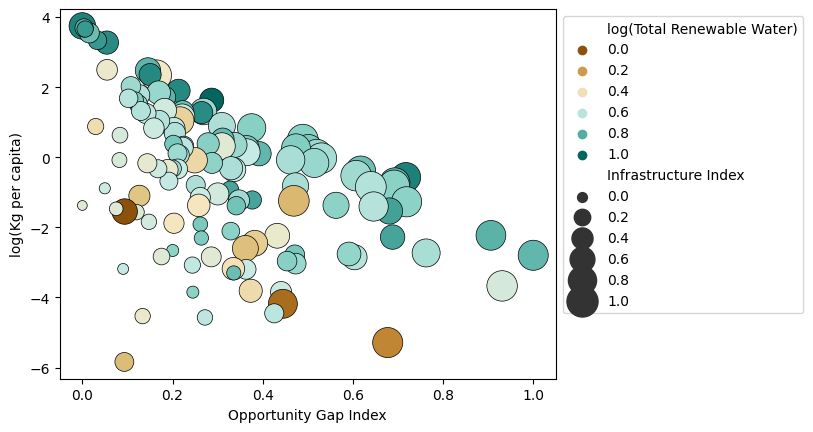

In [344]:
cmap = clr.LinearSegmentedColormap.from_list('dry to wet', 
                                             ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e'], 
                                             N=256)

g = sns.scatterplot(data = opportunity_index_by_country, 
                x = 'Opportunity Gap Index', 
                y = 'log(Kg per capita)',
                hue = 'log(Total Renewable Water)',
                hue_norm=(0,1),
                size = 'Infrastructure Index',
                sizes = (50, 500),
                size_norm= (0,1),
                palette = cmap,
                linewidth = 0.5,
                edgecolor = 'black')

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

# label_point(opportunity_index_by_country['Opportunity Gap Index'], 
#             opportunity_index_by_country['log(Kg per capita)'], 
#             opportunity_index_by_country['Country'], 
#             plt.gca())

(0.0, 0.2)

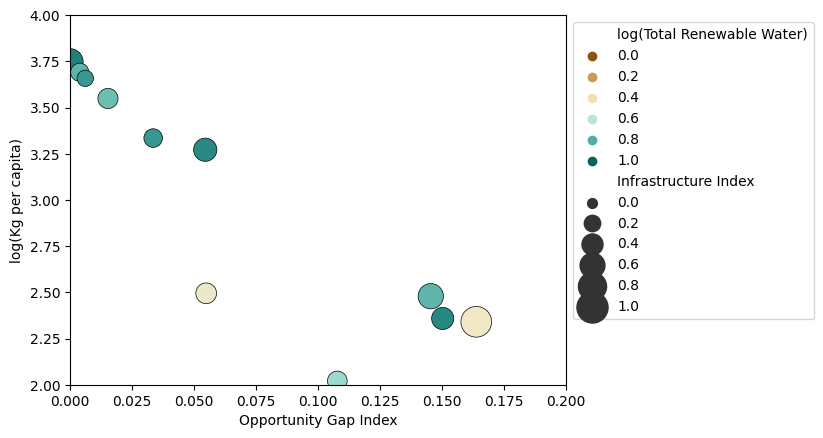

In [343]:
cmap = clr.LinearSegmentedColormap.from_list('dry to wet', 
                                             ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e'], 
                                             N=256)

g = sns.scatterplot(data = opportunity_index_by_country, 
                x = 'Opportunity Gap Index', 
                y = 'log(Kg per capita)',
                hue = 'log(Total Renewable Water)',
                hue_norm=(0,1),
                size = 'Infrastructure Index',
                sizes = (50, 500),
                size_norm= (0,1),
                palette = cmap,
                linewidth = 0.5,
                edgecolor = 'black')

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(2,4)
plt.xlim(0,0.2)

# label_point(opportunity_index_by_country['Opportunity Gap Index'], 
#             opportunity_index_by_country['log(Kg per capita)'], 
#             opportunity_index_by_country['Country'], 
#             plt.gca())

So the metric shows Canada as the highest for its high GDP, plentiful water and low fish farming production. In contrast, Norway scores the lowest as dispite havings a very high oppotunity, it already has a very high production meaning it has realised its potential through very active promotion of the fish farming industry.

In [315]:
africa_to_make_final_metric = opportunity_index_by_country[opportunity_index_by_country['Country']
                                                   .isin(variables.sub_saharan_african_countries)]

In [316]:
africa_to_make_final_metric.sort_values(by = 'Opportunity Gap Index', ascending = False).head(10)

,Country,Opportunity Index,Infrastructure Index,log(Total Renewable Water),Kg per capita,log(Kg per capita),Opportunity Gap Index
109,South Africa,0.550218,0.610756,0.607341,0.057622,-2.853858,0.603782
44,Gabon,0.407098,0.333759,0.697087,0.051668,-2.962910,0.454110
39,Equatorial Guinea,0.349217,0.400495,0.554622,0.021383,-3.845160,0.440764
28,"Congo, Dem. Rep. of the",0.375189,0.132891,0.856207,0.078494,-2.544738,0.392433
27,Congo,0.456756,0.273112,0.822704,0.295573,-1.218838,0.377069
80,Mauritius,0.297295,0.506333,0.380852,0.022174,-3.808841,0.373436
33,Côte d'Ivoire,0.419728,0.404716,0.642655,0.291907,-1.231320,0.347372
20,Cameroon,0.400459,0.282191,0.739969,0.251000,-1.382304,0.341476
77,Madagascar,0.286679,0.120729,0.752567,0.036879,-3.300100,0.335855
3,Angola,0.338460,0.251897,0.689146,0.121584,-2.107153,0.329394


In [317]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

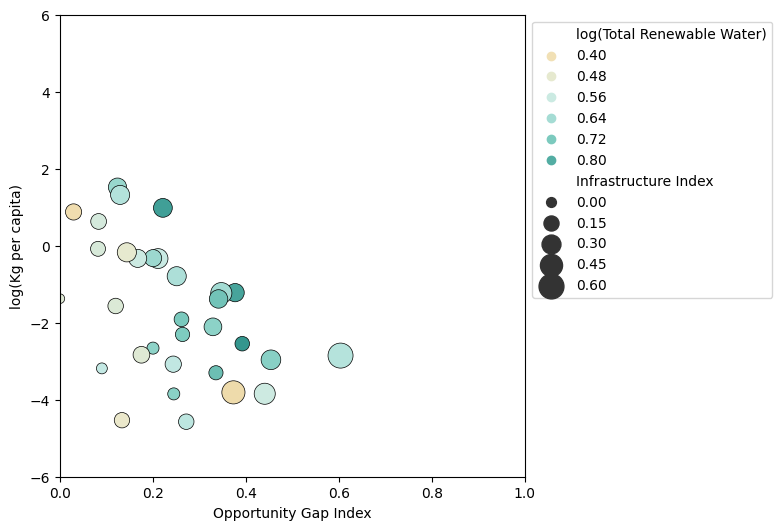

In [346]:
plt.figure(figsize=(6,6))
g = sns.scatterplot(data = africa_to_make_final_metric, 
                x = 'Opportunity Gap Index', 
                y = 'log(Kg per capita)',
                hue = 'log(Total Renewable Water)',
                hue_norm=(0,1),
                size = 'Infrastructure Index',
                sizes = (50,500),
                size_norm= (0,1),
                palette = cmap,
                linewidth = 0.5,
                edgecolor = 'black')
g.set(xlim = (0,1), ylim = (-6,6))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

# label_point(africa_to_make_final_metric['Opportunity Gap Index'], 
#             africa_to_make_final_metric['log(Kg per capita)'], 
#             africa_to_make_final_metric['Country'], 
#             plt.gca())

Now the same for Asian Countries

In [319]:
asia_to_make_final_metric = opportunity_index_by_country[(opportunity_index_by_country['Country']
                                                           .isin(variables.east_asia)) | 
                                                          (opportunity_index_by_country['Country']
                                                           .isin(variables.south_east_asia))]

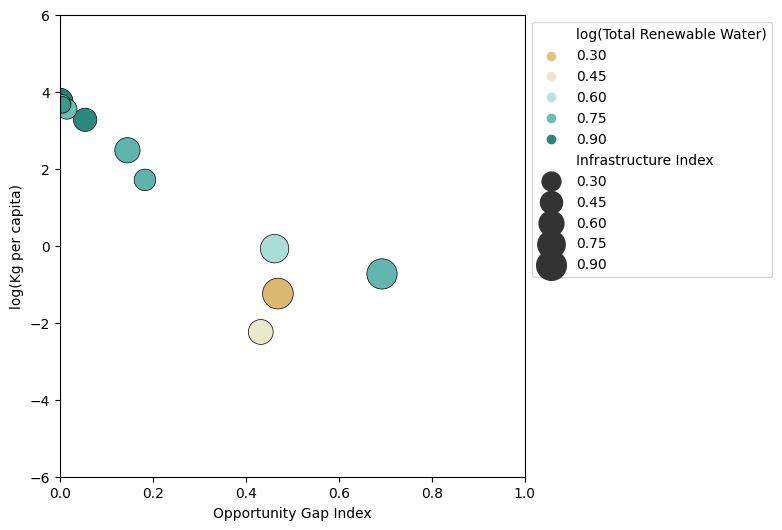

In [345]:
plt.figure(figsize=(6,6))
g = sns.scatterplot(data = asia_to_make_final_metric, 
                x = 'Opportunity Gap Index', 
                y = 'log(Kg per capita)',
                hue = 'log(Total Renewable Water)',
                hue_norm=(0,1),
                size = 'Infrastructure Index',
                sizes = (50,500),
                size_norm= (0,1),
                palette = cmap,
                linewidth = 0.5,
                edgecolor = 'black')
g.set(xlim = (0,1), ylim = (-6,6))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))

# label_point(asia_to_make_final_metric['Opportunity Gap Index'], 
#             asia_to_make_final_metric['log(Kg per capita)'], 
#             asia_to_make_final_metric['Country'], 
#             plt.gca())

So we are ignoring the salt water production